# Import Modules

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Create Dataset

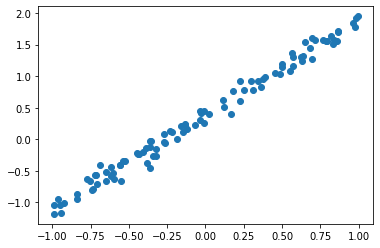

In [29]:
N, D, K = 100, 1, 1     # samples, dimensions/features

X = np.random.random((N, D)) * 2 - 1
w = np.random.randn(D, K)
b = np.random.randn()
Y = X.dot(w) + b + np.random.randn(N, 1) * 0.1

X = X.astype(np.float32)
Y = Y.astype(np.float32)

plt.scatter(X, Y);

# Custom Model

In [41]:
class CustomLinearRegression(tf.keras.Model):
    def __init__(self, num_inputs, num_outputs):
        super(CustomLinearRegression, self).__init__()
        self.W = tf.Variable(
            tf.random_normal_initializer()((num_inputs, num_outputs)))
        self.b = tf.Variable(tf.zeros(num_outputs))
        self.params = [self.W, self.b]

    def call(self, inputs):
        return tf.matmul(inputs, self.W) + self.b


def get_loss(model, inputs, targets):
    predictions = model(inputs)
    error = targets - predictions
    return tf.reduce_mean(tf.square(error))


def get_grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = get_loss(model, inputs, targets)    
    return tape.gradient(loss_value, model.params)  

In [45]:
model = CustomLinearRegression(D, K)

# Initial params
print(model.W, "\n", model.b)

<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.04483846]], dtype=float32)> 
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


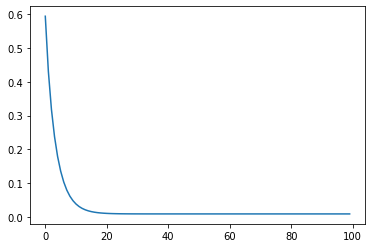

In [46]:
losses = []
optimizer = tf.keras.optimizers.SGD(learning_rate=0.2)

for i in range(100):
    grads = get_grad(model, X, Y)
    optimizer.apply_gradients(zip(grads, model.params))    # One step of gradient descent: param - lr * grad
    loss = get_loss(model, X, Y)
    losses.append(loss)

plt.plot(losses);

# Evaluate

Predicted params: [[1.495047]] [0.38656852]
True params: [[1.49518409]] 0.4029976607036656


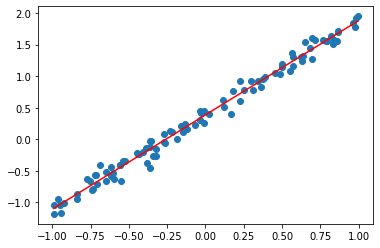

In [52]:
X_ = np.linspace(X.min(), X.max(), 100)
y_pred = model.predict(X_.reshape(-1, 1)).flatten()

print("Predicted params:", model.W.numpy(), model.b.numpy())
print("True params:", w, b)

plt.scatter(X, Y);
plt.plot(X_, y_pred, color="red");